https://www.youtube.com/watch?v=-0qQ_ukDbl8

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# mtcnn 설치
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 8.6 MB/s 


In [3]:
# mtcnn 임포트
import mtcnn
print(mtcnn.__version__)

import matplotlib.pyplot as plt
import numpy as np

0.1.0


Shape of image/array: (244, 325, 4)


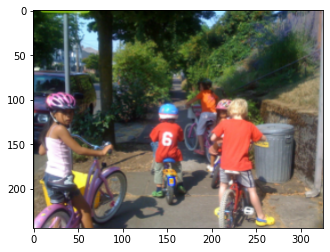

In [ ]:
# 사진 1장 가져와서 시각화
filename = "/content/sample_data/4.jpg"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

# 이미지 불러오기(1장)

In [4]:
filename = "/content/aespa.jpeg"
#filename = "/content/drive/MyDrive/final_project_team8/숙희/헬멧사진 예시/images (3).jpeg"

# 탐지된 얼굴에 맞춰서 사진 자르기

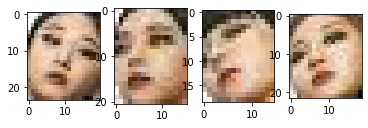

In [5]:
# 탐지된 얼굴에 맞춰서 사진 자르기
def detect_faces(filename):
    pixels = plt.imread(filename)
    # 차원변환 (3차원)
    pixels = np.array(pixels)
    pixels = pixels[..., : 3]

    # 탐지기 선언
    detector = mtcnn.MTCNN()
    # 사진 속 얼굴들 모두 탐지.
    faces = detector.detect_faces(pixels)
    result_list = faces # 탐지된 얼굴들의 bbox정보. 얼굴 1개에 대한 딕셔너리 형태의 정보가 리스트에 담겨있음.

    if faces:
        for i, face in enumerate(faces):
            score = face['confidence']
            if score > 0.50: # 과반 확률로 확신시에 결과출력. 아니면 실패문구 출력.
                x, y, w, h = face['box'] # 탐지된 얼굴에 딱 맞게 자름.
                detected_face = pixels[int(y) : int(y+h), int(x) : int(x+w)]
                plt.subplot(1, len(faces), i+1)
                plt.imshow(detected_face)
    else:
        print('얼굴탐지 실패')


detect_faces(filename)

# (원본)이미지 위에 탐지된 얼굴중심의 bbox 그리기

(183, 275, 3)


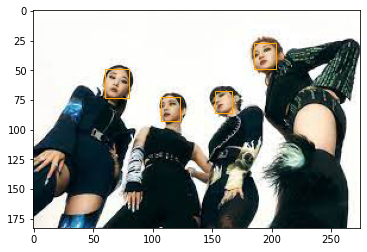

In [6]:
# 탐지된 얼굴에 bbox 그리기.
def draw_facebox(filename):
    pixels = plt.imread(filename)
    # 차원변환 (3차원)
    pixels = np.array(pixels)
    pixels = pixels[..., : 3]

    print(pixels.shape)

    # 탐지기 선언
    detector = mtcnn.MTCNN()
    result_list = detector.detect_faces(pixels)
    # print(result_list)

    # 불러온 (원본)이미지 위에 bbox그리기.
    plt.imshow(pixels)
    ax = plt.gca() # 현재의 Axes를 구함.(get the context for drawing boxes)
    for result in result_list: # 탐지된 얼굴들의 bbox정보. 얼굴 1개에 대한 딕셔너리 형태의 정보가 리스트에 담겨있음.
        # print(result)
        # get coordinates
        x, y, w, h = result['box']
        # 검출된 모든 얼굴에 각각 bbox그리기.
        rect = plt.Rectangle((x, y), w, h, fill=False, color='orange')
        ax.add_patch(rect) # draw the box
    # show the plot
    plt.show()


draw_facebox(filename)

# 넓게넓게~~

x 60
x_wide 50
y 49
y_wide 29
w 49
w_wide 45
h 49
h_wide 54
x 107
x_wide 99
y 72
y_wide 55
w 72
w_wide 36
h 72
h_wide 46
x 152
x_wide 144
y 67
y_wide 51
w 67
w_wide 35
h 67
h_wide 43
x 185
x_wide 175
y 27
y_wide 9
w 27
w_wide 44
h 27
h_wide 49


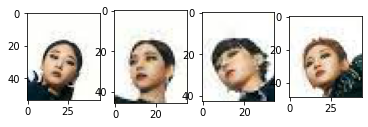

In [9]:
# 탐지된 얼굴에 맞춰서 사진 자르기
def detect_wide_faces(filename):
    pixels = plt.imread(filename)
    # 차원변환 (3차원)
    pixels = np.array(pixels)
    pixels = pixels[..., : 3]

    plt.imshow(pixels)

    # 탐지기 선언
    detector = mtcnn.MTCNN()
    # 사진 속 얼굴들 모두 탐지.
    faces = detector.detect_faces(pixels)

    if faces:
        for i, face in enumerate(faces):
            score = face['confidence']
            if score > 0.50: # 과반 확률로 확신시에 결과출력. 아니면 실패문구 출력.
                x, y, w, h = face['box'] # 탐지된 얼굴에 딱 맞게 자름.

                x_wide = int( max( 0, x - abs(w*0.5) ) )
                y_wide = int( max( 0, y - abs(h*0.8) ) )
                w_wide = int( min( w + abs(x-x_wide)*2.5, pixels.shape[1]) )
                h_wide = int( min( h + abs(y-y_wide)*1.5, pixels.shape[0]) )
                # w_wide = int( max( 0, w + abs(x-x_wide)*2.5 ) )
                # h_wide = int( max( 0, h + abs(y-y_wide)*1.5 ) )
                print('x',x)
                print('x_wide',x_wide)
                print('y',y)
                print('y_wide',y_wide)
                print('w',y)
                print('w_wide',w_wide)
                print('h',y)
                print('h_wide',h_wide)
                detected_face = pixels[y_wide : y_wide+h_wide, x_wide : x_wide+w_wide]
                plt.subplot(1, len(faces), i+1)
                plt.imshow(detected_face)
                plt.imsave(f'{i}.jpg', detected_face) # 이미지 저장
            
    else:
        print('얼굴탐지 실패')

detect_wide_faces(filename)

x 60
x_wide 50.0
y 49
y_wide 29.799999999999997
w 49
w_wide 45
h 49
h_wide 52
x 107
x_wide 99.0
y 72
y_wide 55.2
w 72
w_wide 36
h 72
h_wide 46
x 152
x_wide 144.5
y 67
y_wide 51.8
w 67
w_wide 33
h 67
h_wide 41
x 185
x_wide 175.5
y 27
y_wide 9.399999999999999
w 27
w_wide 42
h 27
h_wide 48


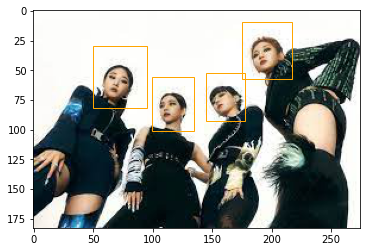

In [10]:
# 탐지된 얼굴에 bbox 그리기.
def draw_wide_facebox(filename):
    pixels = plt.imread(filename)
    # 차원변환 (3차원)
    pixels = np.array(pixels)
    pixels = pixels[..., : 3]

    # 탐지기 선언
    detector = mtcnn.MTCNN()
    result_list = detector.detect_faces(pixels)
    # print(result_list)

    # 불러온 (원본)이미지 위에 bbox그리기.
    plt.imshow(pixels)
    ax = plt.gca() # 현재의 Axes를 구함.(get the context for drawing boxes)
    for result in result_list: # 탐지된 얼굴들의 bbox정보. 얼굴 1개에 대한 딕셔너리 형태의 정보가 리스트에 담겨있음.
        # print(result)
        # get coordinates
        x, y, w, h = result['box']

        x_wide = abs( max( 0, x - abs(w*0.5) ) )
        y_wide = abs( max( 0, y - abs(h*0.8) ) )
        w_wide = int( min( w + abs(x-x_wide)*2.5, pixels.shape[1]) )
        h_wide = int( min( h + abs(y-y_wide)*1.5, pixels.shape[0]) )
        # w_wide = abs( max( 0, w + abs(x-x_wide)*2.5 ) )
        # h_wide = abs( max( 0, h + abs(y-y_wide)*1.5 ) )
        print('x',x)
        print('x_wide',x_wide)
        print('y',y)
        print('y_wide',y_wide)
        print('w',y)
        print('w_wide',w_wide)
        print('h',y)
        print('h_wide',h_wide)

        # 검출된 모든 얼굴에 각각 bbox그리기.
        rect = plt.Rectangle((x_wide, y_wide), w_wide, h_wide, fill=False, color='orange')
        ax.add_patch(rect) # draw the box
    # show the plot
    plt.show()


draw_wide_facebox(filename)